Ch1 p87

Find the max/min points of the function

f(x) = [sin(x)]^6 * e^(20x) * tan(1-x)

on the interval [0,1]. Compare your own root-finding program to 
the IMSL subroutine ZBRENT. [Note the disdavantage in trying to
solve f'(x) = 0 using Newton's method.]

Discussion: <br>

Min/max -> derivative

Used python's Sympy package to handle the messiness of this derivative

Acknowledging the note in the problem statement. Yes the second erivative does not seem pleasant for Newton's method. 

Attempted to apply fixed-point iteration, secant, and muller methods. None of which worked. Also tried bisection which successfully find the root near 0.95.

I spend some time trying to make the other methods converge but it never really worked. I think the extreme slope of the graph near the root makes convergence difficult. I.e. the function is very sensitive in the neighborhood of the root. Small changes in 'x' produce large changes in the function value, f(x).

Upon investigation of the IMSL-ZBRENT method I discovered it also used bisection in tandem with in the inverse quadratic interpolation method. The provides the advantages of the stability of bisection with the possibility of accelerated convergence with the secant method. 

Digging into the ZBRENT function aka the Brent Method which is based on work by Dekker. Dekker uses bisection and secant methods.

&&&<br>
I've decicded I'm going to come back to my investigation of Brent's Method. The rabbit hole goes down through the inverse quadratic interpolation method Lagrange interpolation formula. Lagrange polynomials are cvered in Ch3. I think I will at leasat get through that
<br>
&&&<br>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath
from sympy import symbols, diff, exp, sin, tan
from naf.nonlin import muller, muller_c, fpi, secant, bisect
f = lambda x: pow(math.sin(x),6)*math.exp(20*x)*math.tan(1-x)
#x = symbols('x')
#print(diff(pow(sin(x),6)*exp(20*x)*tan(1-x)))
df = lambda x: (-(math.tan(x - 1)**2 + 1)*math.exp(20*x)*pow(math.sin(x),6)
                - 20*math.exp(20*x)*pow(math.sin(x),6)*math.tan(x - 1) 
                - 6*math.exp(20*x)*pow(math.sin(x),5)*math.cos(x)*math.tan(x - 1))
# cdf = lambda x: (-(cmath.tan(x - 1)**2 + 1)*cmath.exp(20*x)*pow(cmath.sin(x),6)
#                 - 20*cmath.exp(20*x)*pow(cmath.sin(x),6)*cmath.tan(x - 1) 
#                 - 6*cmath.exp(20*x)*pow(cmath.sin(x),5)*cmath.cos(x)*cmath.tan(x - 1))

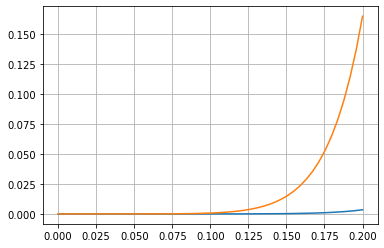

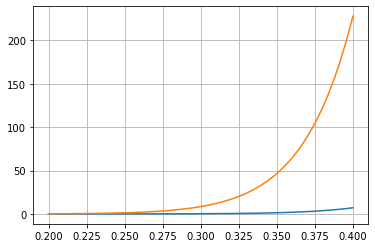

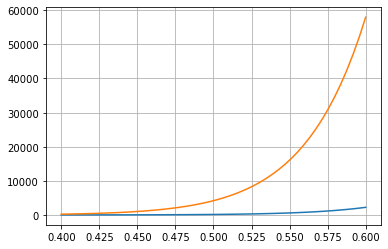

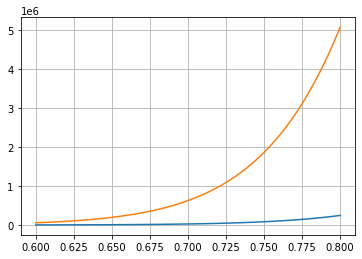

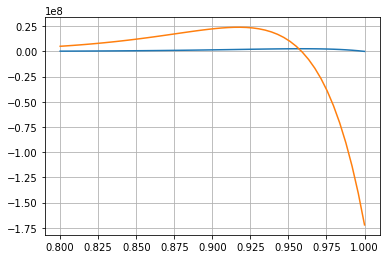

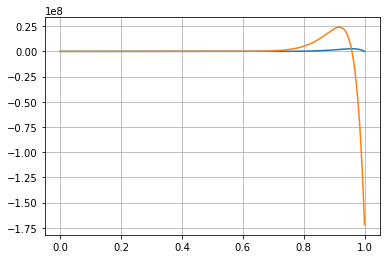

In [3]:
def graph():
    vf = np.vectorize(f)
    vdf = np.vectorize(df)
    xr1 = np.linspace(0, 0.2)
    xr2 = np.linspace(0.2, 0.4)
    xr3 = np.linspace(0.4, 0.6)
    xr4 = np.linspace(0.6, 0.8)
    xr5 = np.linspace(0.8, 1.0)
    xr6 = np.linspace(0, 1,1000)
    
    for xr in (xr1, xr2, xr3, xr4, xr5, xr6):
        fig, axes = plt.subplots()
        axes.grid()
        axes.plot(xr, vf(xr))
        axes.plot(xr, vdf(xr))
        plt.show()
    
graph()

In [4]:
print('\nFirst Root\n')
b1 = bisect(df, -0.4, 0.5)
print(b1)
s1 = secant(df, 0.1, 0.25)
print(s1)
fp1 = fpi(df, 0.1)
print(fp1)
m1 = muller(df, 0.05, 0.25, 0.5)
print(m1)
print('\nSecond Root\n')
b1 = bisect(df, 0.8, 1.0)
print(b1)
#tried secant, fixed-point iteration, and muller
#none of them would converge to the root near 0.95


First Root

(0.04999999999999999, 8.163216649450675e-06, 1)
(0.06917601410734603, 6.10659538322701e-05, 4)
(1.7352090072936748e-73, 0.0, 3)
(0.050000001100302754, 8.163217730563108e-06, 1)

Second Root

(0.9587890625, -214831.67072721384, 10)
